In [14]:
# Import Python libraries to work with SciServer
import SciServer.CasJobs as CasJobs # query with CasJobs
import SciServer.SciDrive as SciDrive   # read/write to/from SciDrive
import SciServer.SkyServer as SkyServer   # show individual objects and generate thumbnail images through SkyServer
print('SciServer libraries imported')

SciServer libraries imported


In [15]:
# Import other libraries for use in this notebook.
import numpy as np                  # standard Python lib for math ops
#from scipy.misc import imsave       # save images as files
import pandas                       # data manipulation package
import matplotlib.pyplot as plt     # another graphing package
import os                           # manage local files in your Compute containers
print('Supporting libraries imported')


Supporting libraries imported


In [17]:
#import astroML
#from astroML.datasets import fetch_sdss_spectrum
from astropy.io import ascii
# Apply some special settings to the imported libraries
# ensure columns get written completely in notebook
pandas.set_option('display.max_colwidth', -1)
# do *not* show python warnings 
import warnings
warnings.filterwarnings('ignore')
print('Settings applied')


Settings applied


In [18]:
# Find objects in the Sloan Digital Sky Survey's Data Release 14.
#
# Query the Sloan Digital Sky Serveys' Data Release 14.
# For the database schema and documentation see http://skyserver.sdss.org/dr14
#
# This query finds all galaxies with a size (petror90_r) greater than 10 arcseconds, within
# a region of sky with 100 < RA < 250, a redshift between 0.02 and 0.5, and a g-band magnitude brighter than 17.
# 
# First, store the query in an object called "query"
query="""
SELECT p.objId,p.ra,p.dec,p.petror90_r, p.expAB_r,
    p.dered_u as u, p.dered_g as g, p.dered_r as r, p.dered_i as i, 
    s.z, s.plate, s.mjd, s.fiberid
FROM galaxy AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.petror90_r > 10
  and p.ra between 100 and 250
  and s.z between 0.02 and 0.5
  and p.g < 17
"""
#Then, query the database. The answer is a table that is being returned to a dataframe that we've named all_gals.
all_gals = CasJobs.executeQuery(query, "dr16")

print("SQL query finished.")
print("SQL query returned " + str(len(all_gals))+ " galaxies")

SQL query finished.
SQL query returned 40332 galaxies


In [19]:
all_gals[0:30]

,objId,ra,dec,petror90_r,expAB_r,u,g,r,i,z,plate,mjd,fiberid
0,1237651271892598827,145.338782,60.735032,19.27053,0.635783,18.01686,16.08480,15.21523,14.77336,0.074648,5716,56684,862
1,1237651271895285893,156.799361,63.968893,10.20452,0.732676,17.99719,16.89227,16.48965,16.33450,0.022344,488,51914,30
2,1237651271895744566,158.787538,64.450701,11.36502,0.648912,16.44495,15.47714,14.99789,14.74447,0.033555,489,51930,134
3,1237651271896072301,160.345644,64.653448,10.92565,0.610096,18.32820,16.90256,16.08510,15.65800,0.137548,489,51930,104
4,1237651271897383030,167.043811,65.693755,19.93624,0.765442,18.34957,16.35210,15.32754,14.89074,0.115611,490,51929,65
5,1237651271897514134,167.954399,65.815570,17.52676,0.614216,17.42230,15.89093,15.13130,14.74487,0.063745,490,51929,24
6,1237651271897907310,169.917819,66.075611,11.37661,0.462223,18.89230,16.94878,15.95506,15.42679,0.095305,491,51942,204
7,1237651271897907324,169.961092,66.070904,10.31823,0.664021,18.27424,16.30876,15.33956,14.89032,0.095846,491,51942,212
8,1237654381446234322,155.809017,58.457353,11.87040,0.388531,17.66907,15.96745,15.19155,14.75085,0.072617,559,52316,146
9,1237654381975437353,131.554084,48.348341,20.29563,0.710043,16.73816,14.90793,14.11314,13.69376,0.029618,550,51959,592


(-5.0, 70.0)

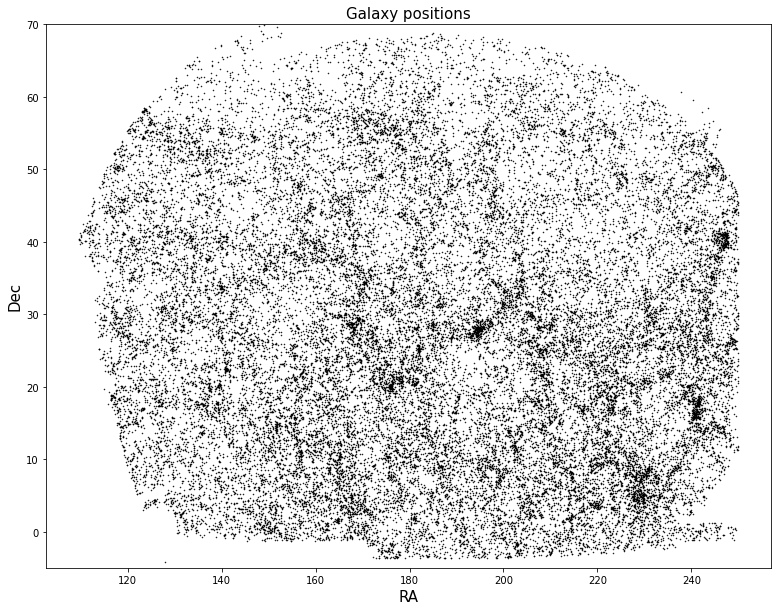

In [9]:
#Possible solution
plt.figure(figsize=(13,10))
plt.scatter(all_gals['ra'], all_gals['dec'], marker='.', color='black',s=1)
plt.xlabel('RA', fontsize=15); plt.ylabel('Dec', fontsize=15)
plt.title('Galaxy positions', fontsize=15)
plt.ylim(-5,70)

### Now, make de gif source.


In [20]:
import imageio #Let us make the gif file.
print('Import successful')

Import successful


In [22]:
#Possible solution

frames= []
num_frame =30

for i in range(50):
    plt.figure(figsize=(13,10))
    slice1 = np.where( (all_gals['z'] > i/100) & (all_gals['z'] < (i+2)/100))[0]
    a= i/100
    b= (i+2)/100

    plt.scatter(all_gals.loc[slice1]['ra'], all_gals.loc[slice1]['dec'], color='green', marker='.', s=20, label= b)
    plt.ylim(-5,70)
    plt.xlabel('RA', fontsize=15); plt.ylabel('Dec', fontsize=15)
    plt.title('Galaxy positions, slice 1', fontsize=15)
    plt.legend()
    filename = f"frame_{i:03d}.png"
    plt.savefig(filename)
    plt.close()

    frames.append(filename)

with imageio.get_writer('grafico_animado.gif', duration=0.5) as writer:
    for filename in frames:
        image = imageio.imread(filename)
        writer.append_data(image)

       
        

print('Gif is ready !')



Gif is ready !


## Galaxy morphology

Galaxy morphology studies the shapes of galaxies. You will already have some understanding of how local galaxies look like, from your exploration of SDSS imaging in the first Lab session using the SDSS SkyServer Navigate Tool. 

Here, we will do a more systematic exploration of how galaxy shapes are related to other properties.

The next cell provides a bit of code that selects 16 **random** galaxies from your dataframe, and shows you their optical images.

In [23]:
def show_galaxy_images(my_galaxies):
    #plot a random subset of 16 galaxies
    # set thumbnail parameters
    width=200           # image width
    height=200          # height
    pixelsize=0.396     # image scale
    plt.figure(figsize=(15, 15))   # display in a 4x4 grid
    subPlotNum = 1


    i = 0
    nGalaxies = 16 #Total number of galaxies to plot
    ind = np.random.randint(0,len(my_galaxies), nGalaxies) #randomly selected rows
    count=0
    for i in ind:           # iterate through the randomly selected rows in the DataFrame
        count=count+1
        print('Getting image '+str(count)+' of '+str(nGalaxies)+'...')
        if (count == nGalaxies):
            print('Plotting images...')
        scale=2*all_gals.loc[i]['petror90_r']/pixelsize/width
        img = SkyServer.getJpegImgCutout(ra=all_gals.loc[my_galaxies[i]]['ra'], dec=all_gals.loc[my_galaxies[i]]['dec'], width=width, height=height, scale=scale,dataRelease='DR14')
        plt.subplot(4,4,subPlotNum)
        subPlotNum += 1
        plt.imshow(img)                               # show images in grid
        plt.title(all_gals.loc[my_galaxies[i]]['z'])     

You can use the function defined above to plot 16 _random_ galaxies from any dataframe. For example, to plot 16 galaxies randomly selected in a redshift slice 0.02 < z < 0.03 you might do:

Getting image 1 of 16...
Getting image 2 of 16...
Getting image 3 of 16...
Getting image 4 of 16...
Getting image 5 of 16...
Getting image 6 of 16...
Getting image 7 of 16...
Getting image 8 of 16...
Getting image 9 of 16...
Getting image 10 of 16...
Getting image 11 of 16...
Getting image 12 of 16...
Getting image 13 of 16...
Getting image 14 of 16...
Getting image 15 of 16...
Getting image 16 of 16...
Plotting images...


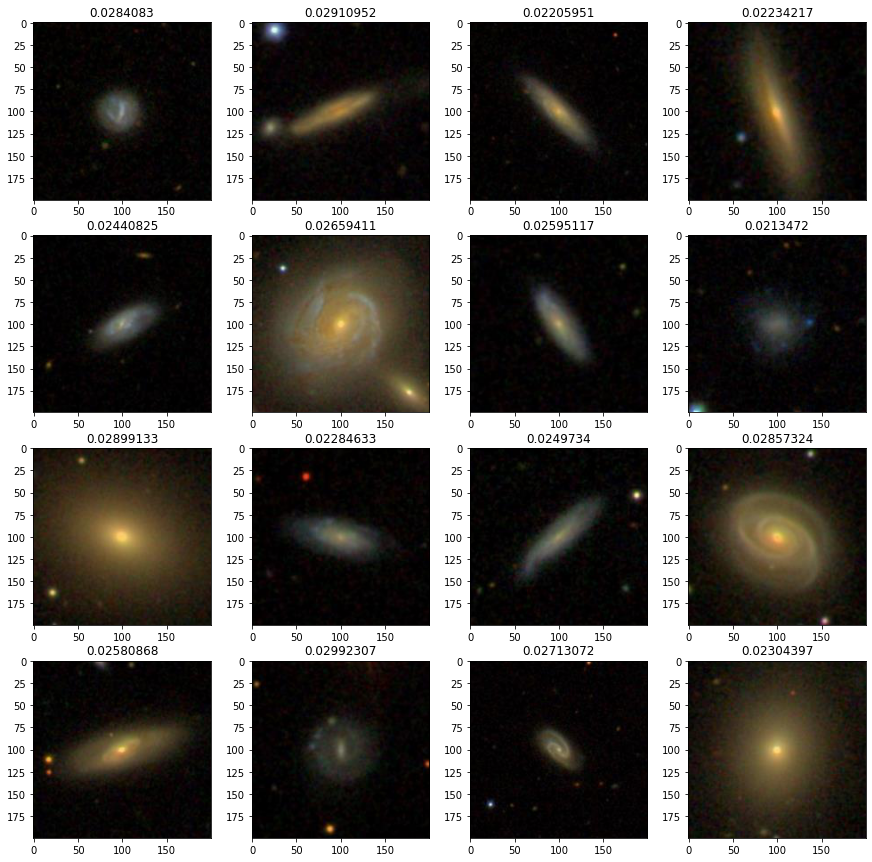

In [24]:
my_galaxies = np.where( (all_gals['z'] > 0.02) & (all_gals['z'] < 0.03))[0]
show_galaxy_images(my_galaxies)
